In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
#df[df['tournament'].str.contains('FIFA',regex=True)]

**获取数据**

In [4]:
df_FIFA = df[df['tournament']=='FIFA World Cup']
df_FIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [5]:
df_FIFA.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [6]:
#将参数转化为datetime
df_FIFA.loc[:,'date'] = pd.to_datetime(df_FIFA.loc[:,'date'])

/home/shaw/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
df_FIFA.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True


In [8]:
df_FIFA.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [9]:
#把年份单独加一列
df_FIFA['year'] = df_FIFA['date'].dt.year
df_FIFA.dtypes

/home/shaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
dtype: object

In [10]:
df_FIFA.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930


In [11]:
df_FIFA['diff_score'] = df_FIFA['home_score'] - df_FIFA['away_score']
df_FIFA.head()
df_FIFA.dtypes

/home/shaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
diff_score             int64
dtype: object

In [12]:
df_FIFA['diff_score'] = pd.to_numeric(df_FIFA['diff_score'])
df_FIFA.dtypes

/home/shaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
year                   int64
diff_score             int64
dtype: object

In [13]:
df_FIFA['win_team'] = ''
df_FIFA.head(1)

/home/shaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,


**获胜队伍**

In [36]:
#最简单的方法
df_FIFA.loc[df_FIFA['diff_score']>0,'win_team'] = df_FIFA.loc[df_FIFA['diff_score']>0,'home_team']
df_FIFA.loc[df_FIFA['diff_score']<0,'win_team'] = df_FIFA.loc[df_FIFA['diff_score']<0,'away_team']
df_FIFA.loc[df_FIFA['diff_score']==0,'win_team'] = 'draw'
df_FIFA.head()

/home/shaw/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,diff_score,win_team
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-3,USA
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930,3,France
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930,-1,Yugoslavia
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930,-2,Romania
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930,1,Argentina


In [33]:

#def get_win_team(df):
    #win = []
    #for i,row in df.iterrows():
        #if row['home_score']>row['away_score']:
            #win.append(row['home_team'])
        #elif row['home_score']<row['away_score']:
            #win.append(row['away_team'])
        #else:
            #win.append('draw')
#df_FIFA['win_team'] = get_win_team(df_FIFA)
#df_FIFA.head()       


**前20强**

In [64]:
s = df_FIFA.groupby('win_team')['win_team'].count()
s

win_team
Algeria                 3
Argentina              42
Australia               2
Austria                12
Belgium                14
Bosnia-Herzegovina      1
Brazil                 70
Bulgaria                3
Cameroon                4
Chile                  11
Colombia                7
Costa Rica              5
Croatia                 7
Cuba                    1
Czech Republic          1
Czechoslovakia         11
Denmark                 8
Ecuador                 4
England                26
France                 28
German DR               2
Germany                66
Ghana                   4
Greece                  2
Hungary                15
Iran                    1
Ireland                 2
Italy                  45
Ivory Coast             3
Jamaica                 1
                     ... 
Mexico                 14
Morocco                 2
Netherlands            27
Nigeria                 5
Northern Ireland        3
Norway                  2
Paraguay                7
Per

In [66]:
s.sort_values(ascending=False, inplace=True)
s

win_team
Brazil                70
Germany               66
Italy                 45
Argentina             42
Spain                 29
France                28
Netherlands           27
England               26
Uruguay               20
Russia                17
Sweden                16
Poland                15
Hungary               15
Yugoslavia            14
Belgium               14
Mexico                14
Portugal              13
Austria               12
Switzerland           11
Czechoslovakia        11
Chile                 11
Romania                8
USA                    8
Denmark                8
Paraguay               7
Colombia               7
Croatia                7
Nigeria                5
Costa Rica             5
Korea Republic         5
                      ..
Cameroon               4
Ghana                  4
Japan                  4
Scotland               4
Peru                   4
Algeria                3
Ivory Coast            3
Bulgaria               3
Serbia          

In [68]:
#s.drop(labels=['draw'], inplace=True)
#s

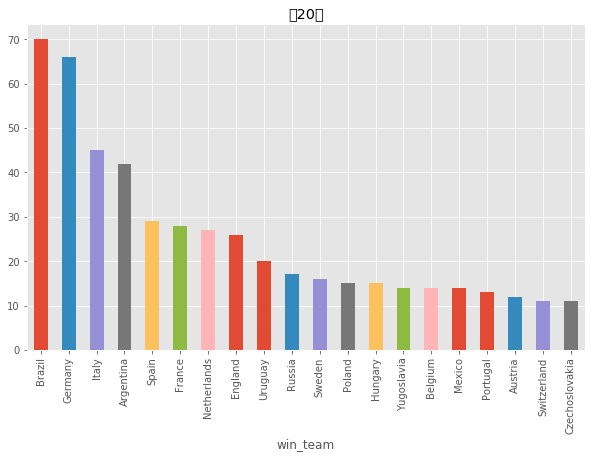

In [69]:
s.head(20).plot(kind='bar',figsize=(10,6),title = '前20强')

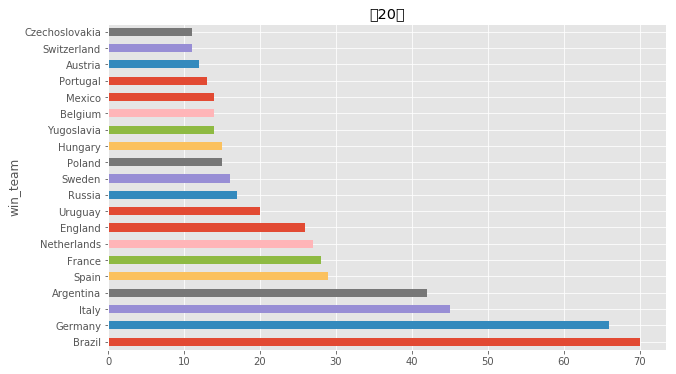

In [70]:
s.head(20).plot(kind='barh',figsize=(10,6),title = '前20强')

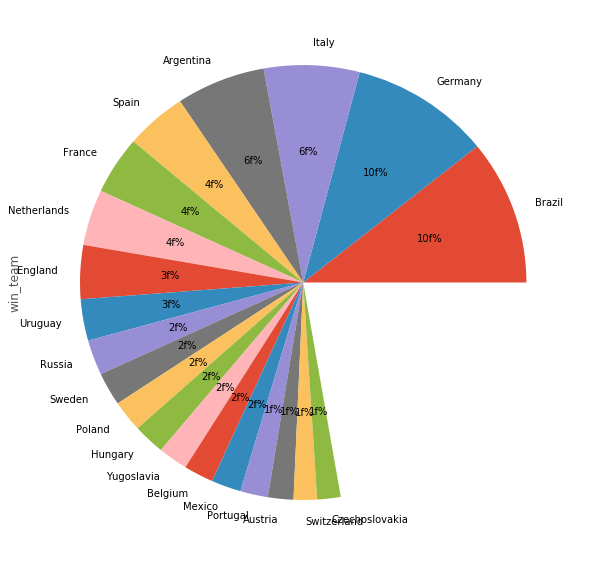

In [73]:
s_percentage = s/s.sum()
s_percentage
s_percentage.head(20).plot(kind='pie',figsize=(10,10),autopct='%.if%%')

In [74]:
#get方法，如果没则默认为NA
s.get('China',default='NA')

'NA'

In [76]:
s.get('Japan',default='NA')

4

In [77]:
s.index

Index(['Brazil', 'Germany', 'Italy', 'Argentina', 'Spain', 'France',
       'Netherlands', 'England', 'Uruguay', 'Russia', 'Sweden', 'Poland',
       'Hungary', 'Yugoslavia', 'Belgium', 'Mexico', 'Portugal', 'Austria',
       'Switzerland', 'Czechoslovakia', 'Chile', 'Romania', 'USA', 'Denmark',
       'Paraguay', 'Colombia', 'Croatia', 'Nigeria', 'Costa Rica',
       'Korea Republic', 'Turkey', 'Ecuador', 'Cameroon', 'Ghana', 'Japan',
       'Scotland', 'Peru', 'Algeria', 'Ivory Coast', 'Bulgaria', 'Serbia',
       'Northern Ireland', 'Saudi Arabia', 'Ukraine', 'Australia',
       'South Africa', 'Senegal', 'Ireland', 'Norway', 'Morocco', 'German DR',
       'Greece', 'Iran', 'Czech Republic', 'Korea DPR', 'Slovakia', 'Slovenia',
       'Bosnia-Herzegovina', 'Wales', 'Tunisia', 'Jamaica', 'Cuba'],
      dtype='object', name='win_team')

In [80]:
df_score_home = df_FIFA[['home_team','home_score']]
column_update = ['team','score']
df_score_home.columns = column_update
df_score_home.head()

,team,score
1277,Belgium,0
1278,France,4
1279,Brazil,1
1280,Peru,1
1281,Argentina,1


In [82]:
df_score_away = df_FIFA[['away_team','away_score']]
column_update = ['team','score']
df_score_away.columns = column_update
df_score_away.head()

,team,score
1277,USA,3
1278,Mexico,1
1279,Yugoslavia,2
1280,Romania,3
1281,France,0


In [87]:
df_score = pd.concat([df_score_home,df_score_away],ignore_index=True)
df_score.head(20)

,team,score
0,Belgium,0
1,France,4
2,Brazil,1
3,Peru,1
4,Argentina,1
5,Chile,3
6,Bolivia,0
7,Paraguay,0
8,Uruguay,1
9,Argentina,6


In [92]:
s_score = df_score.groupby('team')['score'].sum()
s_score.sort_values(ascending=False,inplace=True)
s_score.head(20)

team
Germany           224
Brazil            221
Argentina         131
Italy             128
France            106
Spain              92
Hungary            87
Netherlands        86
Uruguay            80
England            79
Sweden             74
Russia             66
Mexico             57
Yugoslavia         55
Belgium            52
Switzerland        45
Czechoslovakia     44
Poland             44
Portugal           43
Austria            43
Name: score, dtype: int64

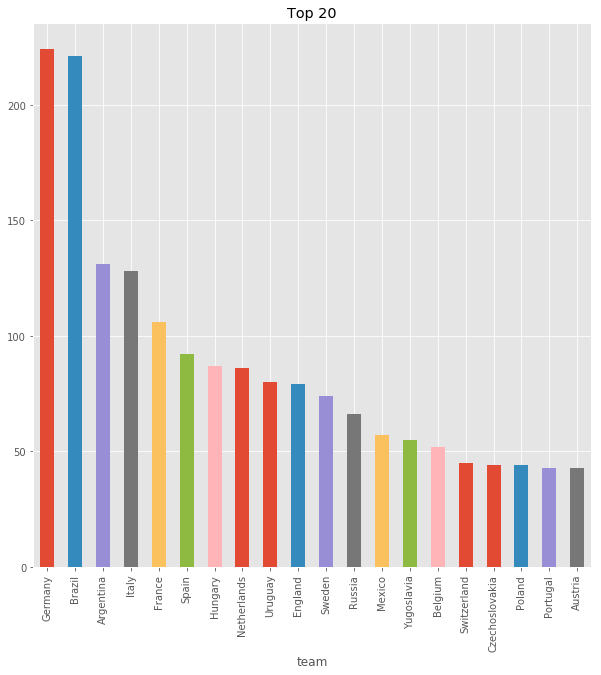

In [93]:
s_score.head(20).plot(kind='bar',figsize=(10,10),title='Top 20')